# Plant Disease Prediction using CNNs(Deep Learning)
Acccuracy is low due to not that good image dataset(Dataset of plant disease was collected by me from google images .
you can expect much greater accuracy on test dataset by putting and cleaning images and balancing the dataset.

Project using CNNs to predict whether the plant is suffering from the disease mentioned in the training label dataset

In [120]:
# load the drive helper and mount
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize, LabelBinarizer
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical

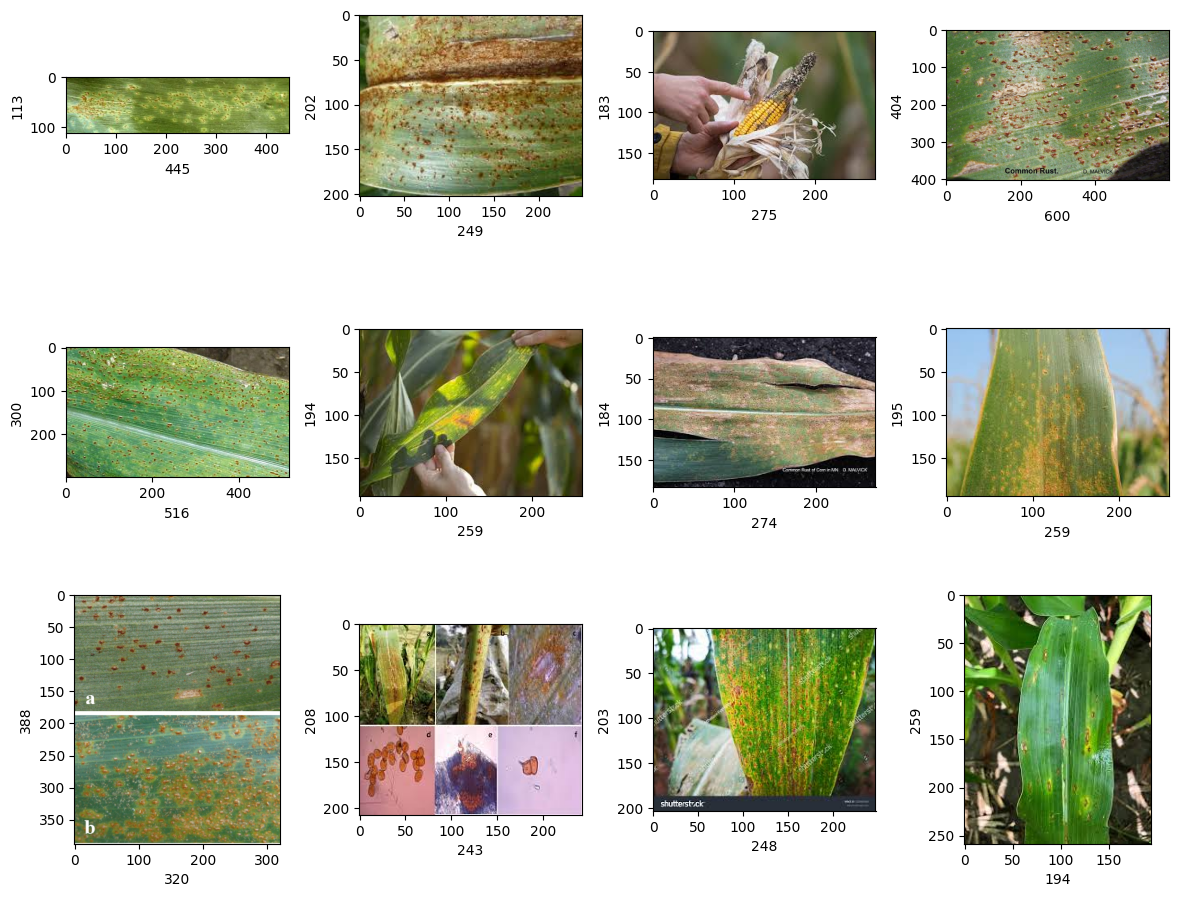

In [122]:
# Plotting 12 Images to Check Dataset
plt.figure(figsize=(12,12))
path = "/content/drive/My Drive/plant_diseases_dataset/corn_common_rust_disease"
for i in range(1,13):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1],fontsize=10) # width of image
  plt.ylabel(rand_img.shape[0], fontsize=10) # height of image



1. `plt.figure(figsize=(12,12))`: This line creates a new figure with a size of 12x12 inches. This figure will be used to display the images.

2. `path = "/content/drive/My Drive/plant_diseases_dataset/corn_common_rust_disease"`: This line assigns the path of the directory containing the images to the variable `path`. The images are expected to be stored in the specified directory.

3. `for i in range(1,17):`: This line starts a loop that iterates from 1 to 16 (inclusive). This loop will be used to plot 16 images.

4. `plt.subplot(4,4,i)`: This line creates a subplot within the figure. The subplot is organized in a 4x4 grid, and the `i`th iteration of the loop determines the position of the subplot within the grid.

5. `plt.tight_layout()`: This line adjusts the spacing between subplots to prevent overlapping.

6. `rand_img = imread(path + '/' + random.choice(sorted(os.listdir(path))))`: This line selects a random image from the directory specified by `path`. It uses the `os.listdir()` function to get a list of all files in the directory, then sorts the list and selects a random file using `random.choice()`. The selected image is read using the `imread()` function and assigned to the variable `rand_img`.

7. `plt.imshow(rand_img)`: This line displays the selected image in the current subplot.

8. `plt.xlabel(rand_img.shape[1],fontsize=10)`: This line sets the x-axis label of the subplot to the width of the image. It uses the `shape` attribute of the `rand_img` array to get the dimensions of the image, and selects the second element of the shape tuple (which represents the width).

9. `plt.ylabel(rand_img.shape[0], fontsize=10)`: This line sets the y-axis label of the subplot to the height of the image. It uses the `shape` attribute of the `rand_img` array to get the dimensions of the image, and selects the first element of the shape tuple (which represents the height).

The code essentially creates a 4x4 grid of subplots within a figure and plots 16 random images from the specified directory. Each subplot displays an image along with its width and height.

Convert the Images into Numpy Array , required because we will normalize our dataset .

In [123]:
# Converting Images into Array.
def convert_image_to_array(image_dir):
  try:
    image = cv2.imread(image_dir)
    if image is not None:
      image = cv2.resize(image,(256,256))

      return img_to_array(image)
    else:
      return np.array([])

  except Exception as e:
    print(f"Error :{e}")
    return None

This function, `convert_image_to_array`, is used to convert an image file into a numerical array that can be processed by machine learning algorithms. Here's a breakdown of what each part of the function does:

1. **Function Definition:** `def convert_image_to_array(image_dir):` This line defines the function and takes one argument, `image_dir`, which is the directory path of the image file.

2. **Try-Except Block:** The function uses a try-except block to handle any potential errors that might occur during the execution of the code. If an error occurs anywhere within the `try` block, the code execution will move to the `except` block.

3. **Image Reading:** `image = cv2.imread(image_dir)` This line uses the `imread` function from the `cv2` library to read the image file at the path specified by `image_dir`. The `imread` function returns an array that represents the image.

4. **Image Checking:** `if image is not None:` This line checks if the image was successfully read. If the image file does not exist or is not a valid image file, `imread` will return `None`, and this check will prevent the function from trying to process an invalid image.

5. **Image Resizing:** `image = cv2.resize(image,(256,256))` If the image was successfully read, this line resizes the image to a size of 256x256 pixels using the `resize` function from the `cv2` library. This is done to ensure that all images processed by the function have the same dimensions, which is a common requirement for machine learning algorithms.

6. **Image Conversion to Array:** `return img_to_array(image)` This line converts the resized image into a numerical array using the `img_to_array` function. This array can then be used as input to a machine learning algorithm.

7. **Empty Array Return:** `else: return np.array([])` If the image was not successfully read (i.e., `image is None`), this line returns an empty numpy array.

8. **Error Handling:** `except Exception as e:` If an error occurs anywhere within the `try` block, the code execution will move to this `except` block. The error message will be printed to the console, and the function will return `None`.

In summary, this function takes the path of an image file, reads the image, resizes it to 256x256 pixels, and then converts it into a numerical array. If the image file cannot be read or an error occurs during processing, the function handles these exceptions gracefully.

Yes, you can use the `imread` function from the `matplotlib` library instead of the `imread` function from the `cv2` (OpenCV) library. Both functions serve the same basic purpose: they read an image file and convert it into an array.

However, there are some differences between the two functions:

1. **Color Channel Order:** The `cv2.imread` function reads images in BGR (Blue, Green, Red) color channel order, while `matplotlib.imread` reads images in RGB (Red, Green, Blue) order. This difference can lead to color distortions if you read an image with one function and then display it with a function that expects the other color channel order.

2. **Return Type:** `cv2.imread` returns images as arrays with data type `uint8` (integer values from 0 to 255). On the other hand, `matplotlib.imread` returns images as floating-point arrays with values from 0.0 to 1.0 if the image file is a PNG. For JPEGs and other formats, `matplotlib.imread` also returns `uint8` arrays.

3. **Performance:** `cv2.imread` is generally faster than `matplotlib.imread`, which can be an advantage if you're working with large images or need to process many images quickly.

In the context of the function you provided, the choice between `cv2.imread` and `matplotlib.imread` doesn't make a significant difference because the image is being resized and converted to an array, which standardizes the format. However, if you were to display the image using `matplotlib.pyplot.imshow` after reading it with `cv2.imread`, you would need to convert the color channels from BGR to RGB to avoid color distortions.

In [124]:
dir = "/content/drive/My Drive/plant_diseases_dataset"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['corn_common_rust_disease', 'potato_early_blight_disease', 'tomato_bacterial_spot_disease']
binary_labels = [0,1,2]
temp = -1

#Reading and converting image to numpy array
for directory in root_dir:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])


This script is used to read images from a directory, convert them into numpy arrays using the `convert_image_to_array` function you provided earlier, and assign labels to these images based on their directory. Here's a breakdown of the code:

1. `dir = "/content/drive/My Drive/plant_diseases_dataset"`: This line sets the variable `dir` to the path of the main directory where the images are stored.

2. `root_dir = listdir(dir)`: This line uses the `listdir` function from the `os` module to get a list of all subdirectories in the main directory. Each subdirectory is assumed to contain images of a specific plant disease.

3. `image_list, label_list = [], []`: These lines initialize two empty lists, `image_list` and `label_list`. `image_list` will store the numpy arrays representing the images, and `label_list` will store the corresponding labels of these images.

4. `all_labels = ['corn_common_rust_disease', 'potato_early_blight_disease', 'tomato_bacterial_spot_disease']`: This line defines a list of all possible labels (plant diseases) that an image can have.

5. `binary_labels = [0,1,2]`: This line defines a list of binary labels corresponding to the `all_labels` list. Each disease is assigned a unique integer.

6. `temp = -1`: This line initializes a variable `temp` with the value -1. This variable is used to assign the correct label to each image.

7. The outer `for` loop (`for directory in root_dir:`) iterates over each subdirectory in the main directory.

8. `plant_image_list = listdir(f"{dir}/{directory}")`: This line gets a list of all image files in the current subdirectory.

9. `temp += 1`: This line increments `temp` by 1 for each new subdirectory. This is used to assign the correct label to each image based on its subdirectory.

10. The inner `for` loop (`for files in plant_image_list:`) iterates over each image file in the current subdirectory.

11. `image_path = f"{dir}/{directory}/{files}"`: This line constructs the full path to the current image file.

12. `image_list.append(convert_image_to_array(image_path))`: This line converts the current image to a numpy array using the `convert_image_to_array` function and appends it to `image_list`.

13. `label_list.append(binary_labels[temp])`: This line appends the label corresponding to the current subdirectory to `label_list`.

In summary, this script reads all images from a directory, converts them into numpy arrays, and assigns them labels based on their subdirectory. The resulting lists of images and labels can then be used to train a machine learning model.

In [125]:
# Visualizing the Number of Classes Count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

2    208
1    188
0    187
dtype: int64

In [126]:
image_list[0].shape # shape of the Image

(256, 256, 3)

In [127]:
# Total Number of Images: (Length of the Label List)
label_list = np.array(label_list)
label_list.shape

(583,)

In [128]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 11)


In [129]:
y_train

array([1, 1, 2, 1, 1, 1, 0, 1, 0, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 0, 0, 0,
       2, 0, 0, 0, 2, 2, 2, 1, 0, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1,
       2, 1, 2, 0, 2, 1, 2, 2, 0, 1, 1, 0, 2, 2, 2, 0, 2, 1, 2, 0, 1, 0,
       0, 2, 1, 2, 1, 0, 0, 1, 0, 2, 2, 0, 2, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 2, 1, 2, 1, 1, 0, 1, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 2, 0, 1, 2, 1, 1,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0,
       2, 2, 1, 0, 1, 0, 2, 2, 2, 1, 0, 1, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1,
       1, 1, 2, 0, 1, 1, 1, 1, 2, 2, 2, 0, 1, 0, 0, 1, 0, 2, 0, 0, 2, 2,
       1, 1, 0, 2, 2, 0, 2, 1, 0, 1, 2, 1, 0, 1, 1, 2, 2, 0, 0, 2, 1, 0,
       0, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 2, 2, 1, 2, 0, 0, 1, 0,
       0, 2, 1, 1, 2, 2, 2, 1, 2, 2, 0, 1, 0, 1, 0, 1, 0, 2, 1, 2, 2, 0,
       1, 2, 2, 1, 2, 0, 1, 0, 1, 2, 1, 2, 2, 0, 1, 0, 2, 1, 2, 0, 1, 2,
       1, 2, 0, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2,

In [130]:
y_train[5]

1

80% Training and 20% Testing Data

In [131]:
x_train = np.array(x_train, dtype=np.float16) / 2250
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train  = x_train.reshape(-1, 256,256,3)
x_test = x_test.reshape(-1, 256,256,3)

In [132]:
x_train

array([[[[0.04044444, 0.06044444, 0.04888889],
         [0.03955556, 0.06177778, 0.04933333],
         [0.03733333, 0.06311111, 0.04933333],
         ...,
         [0.05111111, 0.10311111, 0.08577777],
         [0.04755555, 0.10844444, 0.09022222],
         [0.04844445, 0.11288889, 0.09422223]],

        [[0.03955556, 0.06      , 0.048     ],
         [0.04044444, 0.06266667, 0.05066667],
         [0.04      , 0.06577778, 0.05244444],
         ...,
         [0.04977778, 0.10577778, 0.08844444],
         [0.044     , 0.10888889, 0.09066667],
         [0.04311111, 0.112     , 0.09288889]],

        [[0.03822222, 0.05866667, 0.04711111],
         [0.04133333, 0.06355555, 0.05155556],
         [0.04311111, 0.06933333, 0.05555556],
         ...,
         [0.04577778, 0.10888889, 0.092     ],
         [0.03822222, 0.10977778, 0.09155556],
         [0.03511111, 0.11022222, 0.09155556]],

        ...,

        [[0.11288889, 0.09333333, 0.06622222],
         [0.11244445, 0.09288889, 0.06577778]

This code snippet is related to preprocessing image data for a machine learning model. Here's a breakdown of what each line does:

1. `x_train = np.array(x_train, dtype=np.float16) / 225/0`: This line converts the `x_train` array into a numpy array with a data type of `float16`. The purpose of this conversion is to reduce the memory usage of the array. However, there seems to be a mistake in the code where `225/0` is used as a divisor, which will result in a ZeroDivisionError. It's likely that this is a typo or an error in the code.

2. `x_test = np.array(x_test, dtype=np.float16) / 225.0`: This line converts the `x_test` array into a numpy array with a data type of `float16`. Similar to the previous line, this conversion is done to reduce memory usage. The divisor `225.0` is used to normalize the pixel values of the images. By dividing by 225.0, the pixel values will be scaled to the range of 0 to 1.

3. `x_train = x_train.reshape(-1, 256, 256, 3)`: This line reshapes the `x_train` array to have a new shape of (-1, 256, 256, 3). The -1 in the shape indicates that the size of that dimension will be automatically determined based on the other dimensions and the total number of elements in the array. This line is likely used to reshape the image data into a format suitable for a convolutional neural network (CNN) model, where each image has a height and width of 256 pixels and 3 channels (RGB).

4. `x_test = x_test.reshape(-1, 256, 256, 3)`: This line reshapes the `x_test` array in the same way as the previous line, preparing the test data in the same format as the training data.

In summary, this code snippet converts the image data into a numpy array with reduced memory usage, normalizes the pixel values, and reshapes the data into a format suitable for a CNN model. However, there seems to be an error in the code where `225/0` is used as a divisor, which needs to be corrected.

To address your question, the reshaping step is not directly related to the division by `225.0`. The purpose of reshaping the data is to ensure that it has the correct dimensions for input into a convolutional neural network (CNN) model.

In the case of image data, it is common to represent images as multi-dimensional arrays, where each image has a height, width, and number of channels (e.g., RGB channels). The reshaping step in the code snippet is likely performed to ensure that the image data is in the correct shape for a CNN model, which typically expects input in the form of `(batch_size, height, width, channels)`.

The division by `225.0` is a separate step that is commonly performed to normalize the pixel values of the images. By dividing each pixel value by `225.0`, the resulting values will be scaled to the range of 0 to 1. This normalization step can help improve the convergence and performance of the model during training.

So, to summarize, the reshaping step is necessary to ensure the data has the correct dimensions for a CNN model, while the division by `225.0` is performed to normalize the pixel values of the images.

In [133]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [134]:
y_train

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [135]:
y_train[5]

array([0., 1., 0.], dtype=float32)

The code snippet you provided is related to the conversion of categorical labels into one-hot encoded vectors. Here's an explanation of each line:

1. `y_train = to_categorical(y_train)`: This line converts the `y_train` array of categorical labels into a one-hot encoded representation. One-hot encoding is a technique used to represent categorical data where each category is converted into a binary vector. In this case, the `to_categorical` function is used to perform the conversion. Each label in `y_train` is transformed into a binary vector where the index corresponding to the label is set to 1, and all other indices are set to 0. This representation is useful for training models that require categorical labels as input.

2. `y_test = to_categorical(y_test)`: This line performs the same one-hot encoding conversion for the `y_test` array of categorical labels. It ensures that the test labels are also represented in the same one-hot encoded format as the training labels.

One-hot encoding is commonly used when dealing with categorical labels in machine learning tasks. It allows the model to interpret the labels as distinct categories and avoids any ordinal relationship between the labels. This representation is particularly useful when training models that use categorical cross-entropy loss as the objective function.

By converting the categorical labels into one-hot encoded vectors, the model can better understand and learn from the categorical nature of the labels during training and evaluation.

In [136]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding ='same', input_shape=(256,256,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 85, 85, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 42, 42, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 112896)            0         
                                                                 
 dense_4 (Dense)             (None, 64)               

This code snippet represents the construction of a convolutional neural network (CNN) model using the Keras library. Here's an explanation of each line:

1. `model = Sequential()`: This line initializes a sequential model, which is a linear stack of layers. In this case, the model will be built by adding layers one after another.

2. `model.add(Conv2D(32, (3,3), padding ='same', input_shape=(256,256,3), activation='relu'))`: This line adds a convolutional layer to the model. The `Conv2D` layer performs convolutional operations on the input data. The parameters passed to `Conv2D` are as follows:
   - `32`: This specifies the number of filters (also known as output channels) in the convolutional layer. Each filter learns to detect different features in the input data.
   - `(3,3)`: This specifies the size of the convolutional kernel or filter. In this case, it is a 3x3 filter, which means it will slide over the input data in a 3x3 window.
   - `padding='same'`: This parameter determines the padding strategy. `'same'` padding ensures that the output feature map has the same spatial dimensions as the input.
   - `input_shape=(256,256,3)`: This specifies the shape of the input data. In this case, the input data is expected to have a height and width of 256 pixels and 3 channels (RGB).
   - `activation='relu'`: This specifies the activation function to be applied to the output of the convolutional layer. In this case, the Rectified Linear Unit (ReLU) activation function is used.

3. `model.add(MaxPooling2D(pool_size=(3,3)))`: This line adds a max pooling layer to the model. The `MaxPooling2D` layer reduces the spatial dimensions of the input data by taking the maximum value within each pooling window. The `pool_size=(3,3)` parameter specifies the size of the pooling window.

4. `model.add(Conv2D(64, (3,3), padding='same', activation='relu'))`: This line adds another convolutional layer to the model, similar to the first one. The main difference is that this layer has 64 filters instead of 32.

5. `model.add(MaxPooling2D(pool_size=(2,2)))`: This line adds another max pooling layer to the model, similar to the previous one. The pooling window size is set to (2,2) in this case.

6. `model.add(Flatten())`: This line adds a flatten layer to the model. The `Flatten` layer is used to convert the multi-dimensional output from the previous layer into a one-dimensional vector. This is necessary to connect the convolutional layers to the fully connected layers.

7. `model.add(Dense(64, activation='relu'))`: This line adds a fully connected layer to the model. The `Dense` layer represents a fully connected layer where each neuron is connected to every neuron in the previous layer. The `64` parameter specifies the number of neurons in this layer, and the `activation='relu'` parameter specifies the activation function to be applied.

8. `model.add(Dense(3, activation='softmax'))`: This line adds the final fully connected layer to the model. The `3` parameter specifies the number of neurons in this layer, which corresponds to the number of classes or categories in the classification task. The `activation='softmax'` parameter applies the softmax activation function, which converts the output into a probability distribution over the classes.

9. `model.summary()`: This line prints a summary of the model, displaying the architecture and the number of parameters in each layer.

Regarding the choice of `32` and `(3,3)` in the first `Conv2D` layer, these values are hyperparameters that can be adjusted based on the specific problem and dataset. The number of filters determines the complexity and capacity of the model to learn different features. The size of the convolutional kernel determines the receptive field of the

No, the input image will not be the dot product of 32 3x3 filters. The dot product operation is performed between the filters and the corresponding receptive fields in the input image.

In a convolutional neural network (CNN), each filter is convolved with the input image to produce a feature map. The filter slides over the input image, performing element-wise multiplication between the filter weights and the values in the receptive field, and then summing up the results to produce a single value in the feature map.

In the case of the first `Conv2D` layer in your code snippet, there are 32 filters of size 3x3. Each filter is convolved with the input image independently, resulting in 32 separate feature maps. Each feature map represents the response of a specific filter to different patterns or features in the input image.

So, the dot product operation is performed between each filter and the corresponding receptive field in the input image, not the entire image as a whole. The output of the convolutional layer will be a stack of 32 feature maps, each capturing different patterns or features learned by the filters.

After the stack of 32 feature maps is obtained from the convolutional layer, they will be passed through subsequent layers in the neural network for further processing and eventually used for making predictions.

In the code snippet you provided, the feature maps are passed through a max pooling layer, which reduces the spatial dimensions of each feature map by taking the maximum value within each pooling window. This helps to extract the most important features and reduce the computational complexity of the model.

Next, the feature maps are flattened using the `Flatten` layer, which converts the multi-dimensional feature maps into a one-dimensional vector. This is necessary to connect the convolutional layers to the fully connected layers.

The flattened feature vector is then passed through fully connected layers (`Dense` layers) in the model. These layers are responsible for learning complex patterns and relationships in the data. The number of neurons in these layers and the choice of activation functions determine the capacity and complexity of the model.

In the last `Dense` layer with `activation='softmax'`, the output is transformed into a probability distribution over the classes. This allows the model to make predictions by assigning a probability to each class, indicating the likelihood of the input belonging to that class.

Overall, the stack of 32 feature maps undergoes a series of transformations and computations through different layers in the neural network, ultimately leading to the final prediction output. The specific architecture and configuration of the subsequent layers will depend on the specific problem and requirements of the task at hand.

In [137]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.001), metrics=['accuracy'])

In [138]:
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3)

In [139]:
#Training the Model
epochs = 128
batch_size = 128
history=model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))

Epoch 1/128
3/3 [==============================] - 4s 2s/step - loss: 1.3340 - accuracy: 0.2791 - val_loss: 1.1435 - val_accuracy: 0.3571
Epoch 2/128
3/3 [==============================] - 0s 175ms/step - loss: 1.1227 - accuracy: 0.3252 - val_loss: 1.0981 - val_accuracy: 0.3357
Epoch 3/128
3/3 [==============================] - 0s 177ms/step - loss: 1.0888 - accuracy: 0.4325 - val_loss: 1.1067 - val_accuracy: 0.3357
Epoch 4/128
3/3 [==============================] - 0s 175ms/step - loss: 1.0740 - accuracy: 0.3742 - val_loss: 1.0904 - val_accuracy: 0.3571
Epoch 5/128
3/3 [==============================] - 0s 171ms/step - loss: 1.0517 - accuracy: 0.4356 - val_loss: 1.0928 - val_accuracy: 0.3571
Epoch 6/128
3/3 [==============================] - 0s 173ms/step - loss: 1.0227 - accuracy: 0.5123 - val_loss: 1.0625 - val_accuracy: 0.5500
Epoch 7/128
3/3 [==============================] - 1s 187ms/step - loss: 0.9694 - accuracy: 0.6779 - val_loss: 1.0836 - val_accuracy: 0.4000
Epoch 8/128
3/3 

In [140]:
# Saving the model
model.save("/content/drive/My Drive/plants_disease.h5")
json_model = model.to_json()
with open('/content/drive/My Drive/plant_model.json', 'w') as json_file:
  json_file.write(json_model)
model.save_weights('/content/drive/My Drive/plant_model_weights.h5')

The code snippet you provided demonstrates the saving of a trained model in the H5 format and JSON format, along with the model weights. Here's an explanation of each line:

1. `model.save("/content/drive/My Drive/plants_disease.h5")`: This line saves the entire model, including the model architecture, optimizer state, and weights, in the H5 format. The model is saved to the specified file path ("/content/drive/My Drive/plants_disease.h5").

2. `json_model = model.to_json()`: This line converts the model architecture to a JSON string representation using the `to_json()` method. The JSON format represents the model's architecture in a human-readable text format.

3. `with open('/content/drive/My Drive/plant_model.json', 'w') as json_file: json_file.write(json_model)`: This block of code opens a file named "plant_model.json" in write mode and writes the JSON representation of the model architecture to the file. The `with` statement ensures that the file is properly closed after writing.

4. `model.save_weights('/content/drive/My Drive/plant_model_weights.h5')`: This line saves only the weights of the model to a separate H5 file named "plant_model_weights.h5". This allows you to save and load the model weights separately from the model architecture.


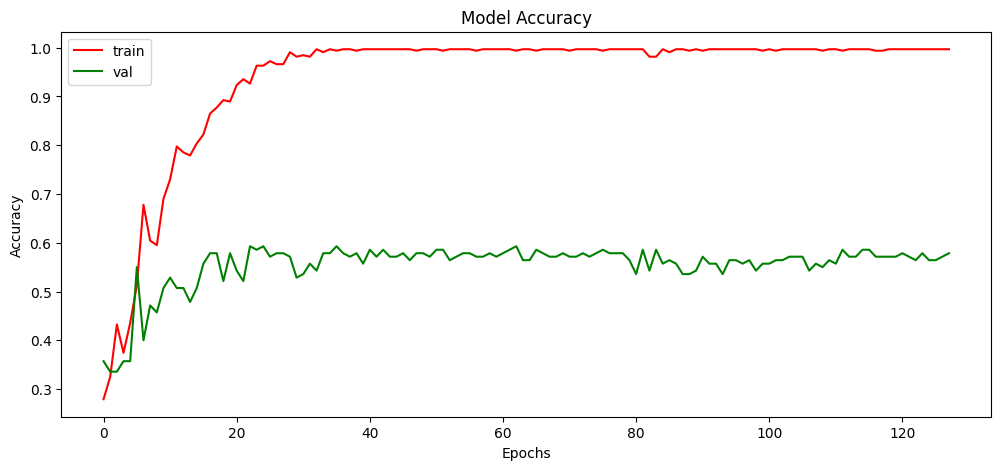

In [141]:
# Plotting the training history
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='g')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [142]:
# Evaluating the Model Accuracy

print('[INFO] Calculating Model Accuracy')
scores = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {scores[1]*100}')

[INFO] Calculating Model Accuracy
4/4 [==============================] - 0s 19ms/step - loss: 11.2620 - accuracy: 0.5812
Test Accuracy: 58.11966061592102


In [145]:
y_pred = model.predict(x_test)

4/4 [==============================] - 0s 19ms/step


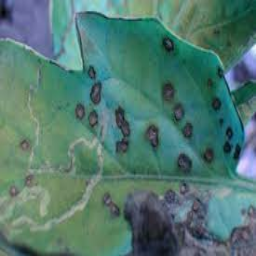

In [143]:
img = array_to_img(x_test[5])
img

In [148]:
#Finding max Value from Prediction list and Comparing original value vs predicted

print("Originally : ", all_labels[np.argmax(y_test[10])])
print("Predicted : ", all_labels[np.argmax(y_pred[10])])

Originally :  tomato_bacterial_spot_disease
Predicted :  tomato_bacterial_spot_disease


In [149]:
#Finding max Value from Prediction list and Comparing original value vs predicted

print("Originally : ", all_labels[np.argmax(y_test[5])])
print("Predicted : ", all_labels[np.argmax(y_pred[5])])

Originally :  potato_early_blight_disease
Predicted :  potato_early_blight_disease


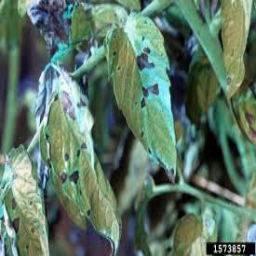

In [151]:
img = array_to_img(x_test[6])
img

In [150]:
#Finding max Value from Prediction list and Comparing original value vs predicted

print("Originally : ", all_labels[np.argmax(y_test[6])])
print("Predicted : ", all_labels[np.argmax(y_pred[6])])

# Wrongly Predicted

Originally :  tomato_bacterial_spot_disease
Predicted :  potato_early_blight_disease


# Conclusion

A deep learning application for classifying disease by input Image of Plant with the hlp of CNNs